In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm

In [2]:
csv_filepath = "../LA_error_csv"

In [3]:
def seperate_csv(filepath):
    df = pd.read_csv(filepath)
    predictions_df = df.iloc[:, 0]
    actual_df = df.iloc[:, 1]

    return predictions_df, actual_df

In [4]:
def reg_metrics(predicted, actual):
    r2 = skm.r2_score(actual, predicted)
    mae = skm.mean_absolute_error(actual, predicted)
    mape = skm.mean_absolute_percentage_error(actual, predicted)
    rmse = np.sqrt(skm.mean_squared_error(actual, predicted))
    mean = np.mean(actual)
    
    return r2,mae,mape,rmse,mean

In [5]:
predicted, actual = seperate_csv(csv_filepath)

In [6]:
r2_train_h2,mae_train_h2,mape_train_h2, rmse_train_h2,mean_train_h2 = reg_metrics(actual, predicted)

metrics_dict = {'R2': r2_train_h2, 'MAE': mae_train_h2, 'MAPE': mape_train_h2, 'RMSE': rmse_train_h2, 'Mean': mean_train_h2}
metrics_df = pd.DataFrame([metrics_dict])
metrics_df

,R2,MAE,MAPE,RMSE,Mean
0,0.993879,29.504814,0.056932,43.473641,744.695344


Text(0, 0.5, 'Estimated LA(mm2)')

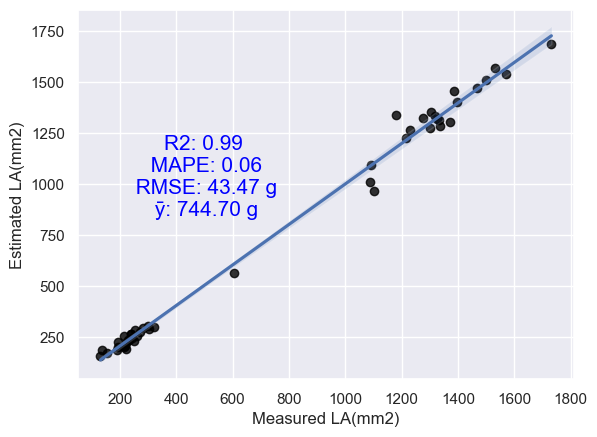

In [7]:
sns.set_theme(style="darkgrid")
sns.regplot(x= actual, y=predicted,
    ci=99, color="black", line_kws=dict(color="b"),
)

plt.text(np.mean(actual)/1.5,np.mean(actual)/0.9, 
         f'R2: {r2_train_h2:.2f}\n MAPE: {mape_train_h2:.2f}\n RMSE: {rmse_train_h2:.2f} g\n ȳ: {mean_train_h2:.2f} g' , 
         fontsize=15, verticalalignment='bottom', 
         horizontalalignment='center', color='blue')

plt.xlabel('Measured LA(mm2)')
plt.ylabel('Estimated LA(mm2)')
